<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
sns.set_style("darkgrid")
sns.set(font_scale=1.1)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
!ls '../datasets/' 

README.md                               countrywise_airtraffic_tofrom_india.csv
airlinewise_airtraffic_tofrom_india.csv fifa19_players.csv
citywise_airtraffic_tofrom_india.csv


In [14]:
countrywise = pd.read_csv('../datasets/countrywise_airtraffic_tofrom_india.csv', error_bad_lines=False)

countrywise['NET TRAFFIC TO INDIA'] = countrywise['PASSENGERS TO INDIA'] - countrywise['PASSENGERS FROM INDIA']
countrywise['TOTAL TRAFFIC'] = countrywise['PASSENGERS TO INDIA'] + countrywise['PASSENGERS FROM INDIA']
countrywise.head()

,YEAR,QUARTER,COUNTRY NAME,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,NET TRAFFIC TO INDIA,TOTAL TRAFFIC
0,2015,Q1,AFGHANISTAN,37194,32721,96.7,676.4,4473,69915
1,2015,Q1,AUSTRALIA,16676,19075,89.7,423.7,-2399,35751
2,2015,Q1,AUSTRIA,13318,15529,563.8,707.0,-2211,28847
3,2015,Q1,BAHRAIN,114087,133527,585.7,1909.5,-19440,247614
4,2015,Q1,BANGLADESH,76357,75673,624.1,1052.9,684,152030


In [141]:
airlinewise = pd.read_csv('../datasets/airlinewise_airtraffic_tofrom_india.csv', error_bad_lines= False)

airlinewise['NET TRAFFIC TO INDIA'] = airlinewise['PASSENGERS TO INDIA'] - airlinewise['PASSENGERS FROM INDIA']
airlinewise['TOTAL TRAFFIC'] = airlinewise['PASSENGERS TO INDIA'] + airlinewise['PASSENGERS FROM INDIA']
airlinewise['MONTH'] = airlinewise['MONTH'].astype(str)
airlinewise['YEAR'] = airlinewise['YEAR'].astype(str)
airlinewise['PERIOD'] = airlinewise['MONTH'] + ', ' + airlinewise['YEAR']
airlinewise['PERIOD'] = pd.to_datetime(airlinewise['PERIOD'])
airlinewise['YEAR'] = airlinewise['YEAR'].astype(int)
airlinewise.head()

,YEAR,MONTH,QUARTER,AIRLINE NAME,CARRIER TYPE,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,FREIGHT TO INDIA,FREIGHT FROM INDIA,NET TRAFFIC TO INDIA,TOTAL TRAFFIC,PERIOD
0,2015,JAN,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,-15344.0,533096.0,2015-01-01
1,2015,JAN,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,-21019.0,212181.0,2015-01-01
2,2015,JAN,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,-6100.0,142324.0,2015-01-01
3,2015,JAN,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,-11263.0,652969.0,2015-01-01
4,2015,JAN,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,-4586.0,80350.0,2015-01-01


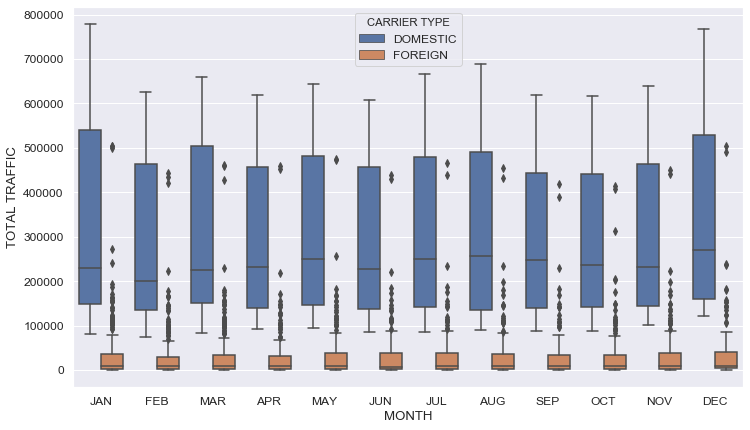

In [142]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'MONTH', y = 'TOTAL TRAFFIC', data=airlinewise, hue = 'CARRIER TYPE' )

In [143]:
only_international = airlinewise.loc[airlinewise['CARRIER TYPE'] == 'FOREIGN']

only_international_grp = only_international.groupby(by = 'AIRLINE NAME').sum()
only_international_grp = only_international_grp[['PASSENGERS TO INDIA', 'PASSENGERS FROM INDIA', 'NET TRAFFIC TO INDIA', 'TOTAL TRAFFIC']]
only_international_grp.sort_values(by = 'TOTAL TRAFFIC', ascending = False, inplace = True)
only_international_grp.reset_index(inplace = True)
only_international_grp.head()

,AIRLINE NAME,PASSENGERS TO INDIA,PASSENGERS FROM INDIA,NET TRAFFIC TO INDIA,TOTAL TRAFFIC
0,EMIRATES AIRLINE,5981862.0,6214850,-232988.0,12196712.0
1,ETIHAD AIRLINES,2715962.0,2813097,-97135.0,5529059.0
2,AIR ARABIA,1964928.0,2031394,-66466.0,3996322.0
3,OMAN AIR,1758656.0,1802529,-43873.0,3561185.0
4,QATAR AIRWAYS,1654189.0,1646102,8087.0,3300291.0


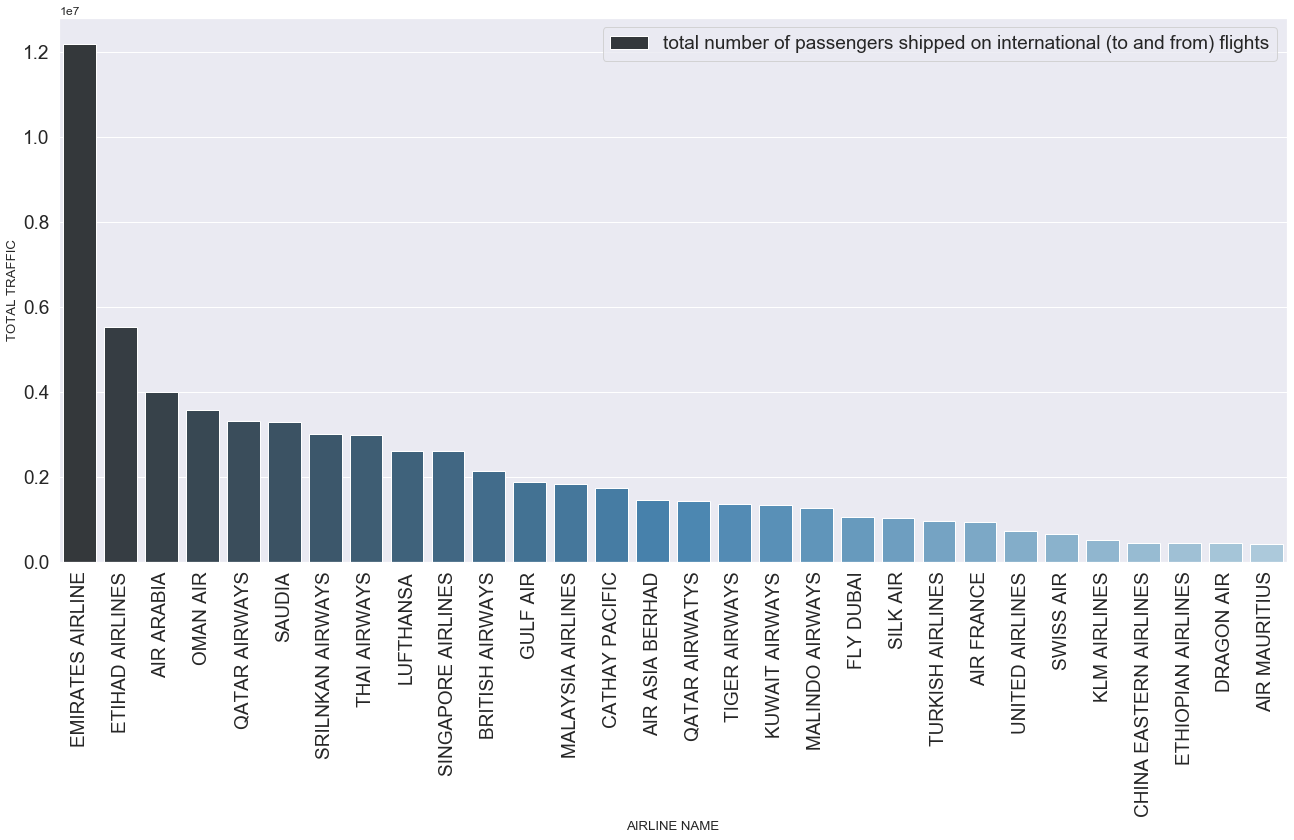

In [144]:
plt.figure(figsize=(22, 10))
sns.barplot(x='AIRLINE NAME', y='TOTAL TRAFFIC', data=only_international_grp.head(
    30), label='total number of passengers shipped on international (to and from) flights', palette="Blues_d")
plt.legend(fontsize = 'x-large')
plt.xticks(fontsize = 'x-large', rotation=90)
plt.yticks(fontsize = 'x-large')
plt.show()

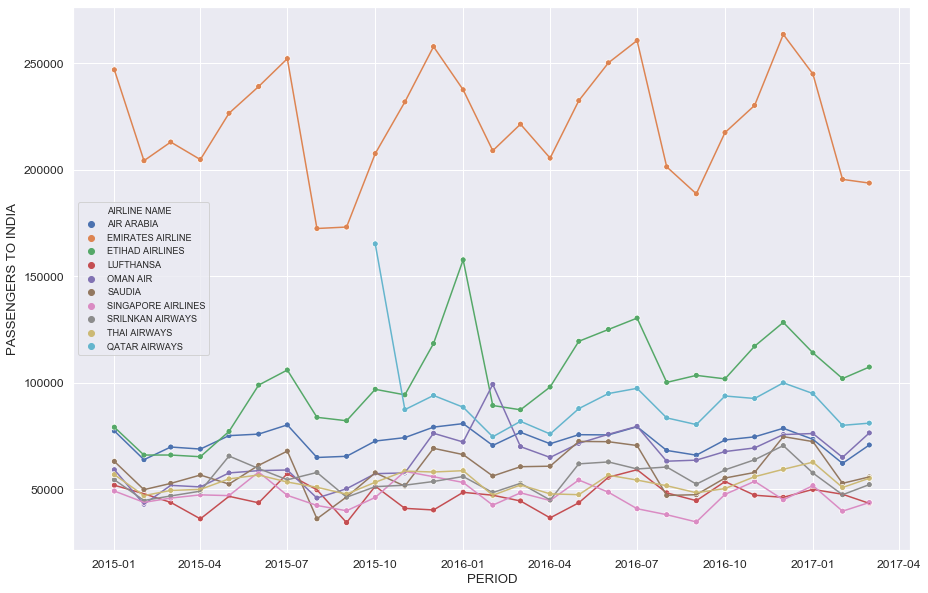

In [172]:
only_international_grp.sort_values(by = 'PASSENGERS TO INDIA', ascending = False, inplace = True)

top_international_airlines = only_international.loc[only_international['AIRLINE NAME'].isin(
    list(only_international_grp['AIRLINE NAME'].head(10)))]

plt.figure(figsize=(15, 10))
sns.lineplot(x = 'PERIOD', y = 'PASSENGERS TO INDIA', 
             data= top_international_airlines, hue='AIRLINE NAME', legend=False)
sns.scatterplot(x = 'PERIOD', y = 'PASSENGERS TO INDIA', 
             data= top_international_airlines, hue='AIRLINE NAME' )
plt.legend(fontsize = 'x-small', loc = 'center left')
plt.show()

In [174]:
!jupyter nbconvert --to html 15.2_Exploring_data_with_Seaborn_plot.ipynb
!mv 15.2_Exploring_data_with_Seaborn_plot.html html-saves/
!git add .
!git commit -m "seaborn visualtions"
!git push

[NbConvertApp] Converting notebook 15.2_Exploring_data_with_Seaborn_plot.ipynb to html
[NbConvertApp] Writing 664306 bytes to 15.2_Exploring_data_with_Seaborn_plot.html
[master d9a6ae7] seaborn visualtions
 3 files changed, 47 insertions(+), 132 deletions(-)
Enumerating objects: 15, done.
Counting objects: 100% (15/15), done.
Delta compression using up to 4 threads
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 5.50 KiB | 625.00 KiB/s, done.
Total 8 (delta 6), reused 0 (delta 0)
remote: Resolving deltas: 100% (6/6), completed with 5 local objects.
To https://github.com/chanvarma/thinkful-capstones.git
   2a24ad0..d9a6ae7  master -> master
